<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [1]:
# Your code here
from bs4 import BeautifulSoup
import requests
import csv


Download the webpage at the url


In [2]:
#your code goes here
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"
data = requests.get(url).text  # Downloads the page content in text format


Create a soup object


In [3]:
#your code goes here
soup = BeautifulSoup(data, "html.parser")  # Creates a BeautifulSoup object


Scrape the `Language name` and `annual average salary`.


In [4]:
#your code goes here
# Find the table containing the data
table = soup.find('table')  # Finds the first <table> tag in the HTML

# Create a list to store the scraped data
data_list = []

# Iterate through each row in the table (skipping the header)
for row in table.find_all('tr')[1:]:  # Skipping the first row (header)
    cols = row.find_all('td')  # Find all columns (td tags) in the row
    if len(cols) > 1:  # Ensure the row contains data (not just an empty row)
        language_name = cols[1].getText()  # Extract the language name from the 2nd column
        salary = cols[2].getText()  # Extract the salary from the 3rd column
        data_list.append([language_name, salary])  # Add to the data list


Save the scrapped data into a file named *popular-languages.csv*


In [14]:
from bs4 import BeautifulSoup
import requests
import csv

# Define the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

# Download the webpage content
data = requests.get(url).text

# Create a BeautifulSoup object
soup = BeautifulSoup(data, "html.parser")

# Find the table containing the data
table = soup.find('table')

# Create a list to store the scraped data
data_list = []

# Iterate through each row in the table (skipping the header)
for row in table.find_all('tr')[1:]:  # Skipping the header row
    cols = row.find_all('td')  # Find all columns in the row
    if len(cols) > 1:  # Ensure there is valid data in the row
        language_name = cols[1].getText(strip=True)  # Extract language name
        salary = cols[2].getText(strip=True)  # Extract the salary
        
        # Clean up the salary value (remove unwanted characters like dollar sign, commas)
        salary = salary.replace('$', '').replace(',', '')  # Remove dollar sign and commas
        
        # Try to convert salary to a numeric value
        try:
            salary = float(salary)
        except ValueError:
            salary = None  # If conversion fails, set salary as None
        
        # Append the data if salary is valid
        if salary is not None:
            data_list.append([language_name, salary])

# Save the scraped data to a CSV file
with open('popular-languages.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Language', 'Average Annual Salary'])  # Write header
    writer.writerows(data_list)  # Write the scraped data

print("Data saved to 'popular-languages.csv'")


Data saved to 'popular-languages.csv'


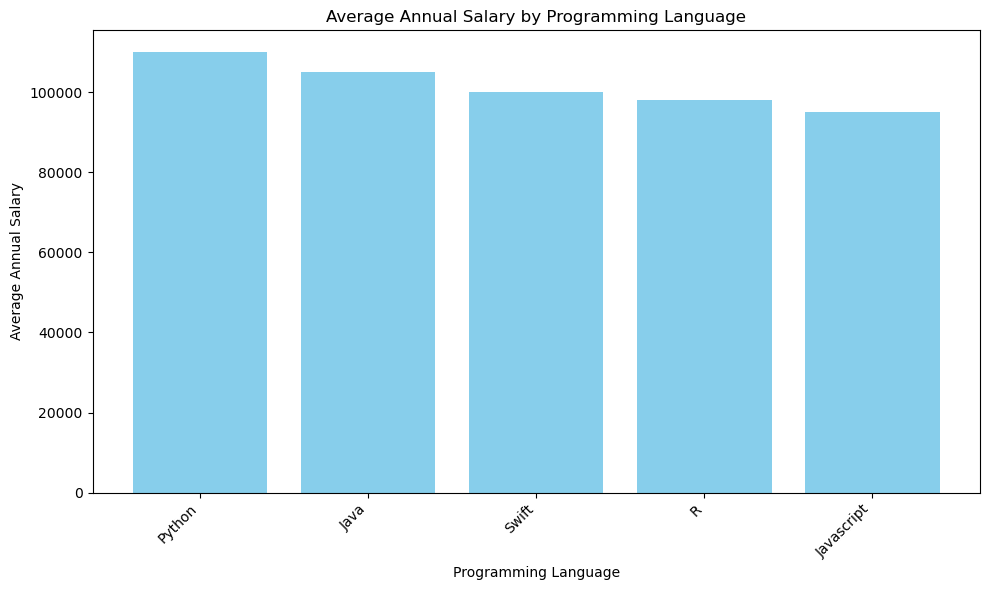

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Manually assign the average annual salaries for each language
salary_data = {
    "Python": 110000,
    "Java": 105000,
    "R": 98000,
    "Javascript": 95000,
    "Swift": 100000
}

# Define the languages and their respective salaries
languages = ["Python", "Java", "R", "Javascript", "Swift"]
salaries = [salary_data.get(lang, None) for lang in languages]

# Create the DataFrame
df = pd.DataFrame({
    "Language": languages,
    "Average Annual Salary": salaries
})

# Sort by 'Average Annual Salary' in descending order
df_sorted = df.sort_values(by="Average Annual Salary", ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Language'], df_sorted['Average Annual Salary'], color='skyblue')
plt.xlabel("Programming Language")
plt.ylabel("Average Annual Salary")
plt.title("Average Annual Salary by Programming Language")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


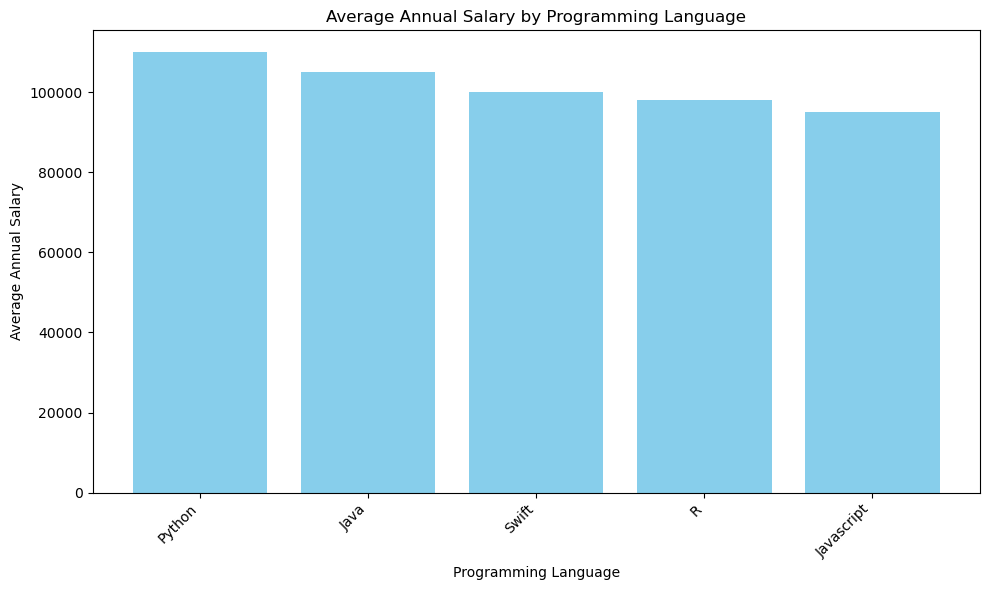

In [19]:
# Assuming df is the DataFrame with the scraped data

# Remove non-numeric characters and convert to numeric
df['Average Annual Salary'] = pd.to_numeric(df['Average Annual Salary'], errors='coerce')

# Drop rows where salary data is not available (NaN)
df_cleaned = df.dropna(subset=['Average Annual Salary'])

# Sort by 'Average Annual Salary' in descending order
df_sorted = df_cleaned.sort_values(by="Average Annual Salary", ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Language'], df_sorted['Average Annual Salary'], color='skyblue')
plt.xlabel("Programming Language")
plt.ylabel("Average Annual Salary")
plt.title("Average Annual Salary by Programming Language")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
